In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [167]:
new = pd.read_csv('all_matches.csv', low_memory=False)
print(new.shape)
print(new.head())
print(new.tail(6))
new.dtypes

(194354, 22)
   match_id   season  start_date                  venue  innings  ball  \
0    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1   0.1   
1    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1   0.2   
2    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1   0.3   
3    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1   0.4   
4    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1   0.5   

            batting_team                 bowling_team      striker  \
0  Kolkata Knight Riders  Royal Challengers Bangalore   SC Ganguly   
1  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
2  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
3  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
4  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   

   non_striker  ... extras  wides  noballs  byes  legbyes  penalty  \
0  BB McCullum  ...      1    NaN      NaN   NaN   

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [168]:
new.describe(include = 'all')

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
count,1.943540e+05,194354,194354,194354,194354.000000,194354.000000,194354,194354,194354,194354,...,194354.000000,5884.000000,774.000000,511.000000,3118.000000,2.0,9560,9560,0.0,0.0
unique,NaN,14,599,42,NaN,NaN,15,15,540,533,...,NaN,NaN,NaN,NaN,NaN,NaN,9,510,NaN,NaN
top,NaN,2013,2020-10-18,Eden Gardens,NaN,NaN,Mumbai Indians,Mumbai Indians,V Kohli,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,caught,RG Sharma,NaN,NaN
freq,NaN,18177,520,17988,NaN,NaN,24618,24607,4642,4640,...,NaN,NaN,NaN,NaN,NaN,NaN,5766,168,NaN,NaN
mean,7.587790e+05,NaN,NaN,NaN,1.483839,9.532730,NaN,NaN,NaN,NaN,...,0.066420,1.210401,1.045220,1.831703,1.293137,5.0,NaN,NaN,NaN,NaN
std,3.070766e+05,NaN,NaN,NaN,0.503402,5.682251,NaN,NaN,NaN,NaN,...,0.340048,0.796209,0.372776,1.292153,0.829763,0.0,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,1.000000,0.100000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,NaN,NaN
25%,5.012280e+05,NaN,NaN,NaN,1.000000,4.500000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,NaN,NaN
50%,7.292990e+05,NaN,NaN,NaN,1.000000,9.400000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,NaN,NaN
75%,1.082630e+06,NaN,NaN,NaN,2.000000,14.400000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN,NaN,NaN


In [169]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                194354 non-null  int64  
 1   season                  194354 non-null  object 
 2   start_date              194354 non-null  object 
 3   venue                   194354 non-null  object 
 4   innings                 194354 non-null  int64  
 5   ball                    194354 non-null  float64
 6   batting_team            194354 non-null  object 
 7   bowling_team            194354 non-null  object 
 8   striker                 194354 non-null  object 
 9   non_striker             194354 non-null  object 
 10  bowler                  194354 non-null  object 
 11  runs_off_bat            194354 non-null  int64  
 12  extras                  194354 non-null  int64  
 13  wides                   5884 non-null    float64
 14  noballs             

In [170]:
new.describe(include=np.object)

,season,start_date,venue,batting_team,bowling_team,striker,non_striker,bowler,wicket_type,player_dismissed
count,194354,194354,194354,194354,194354,194354,194354,194354,9560,9560
unique,14,599,42,15,15,540,533,422,9,510
top,2013,2020-10-18,Eden Gardens,Mumbai Indians,Mumbai Indians,V Kohli,S Dhawan,Harbhajan Singh,caught,RG Sharma
freq,18177,520,17988,24618,24607,4642,4640,3457,5766,168


In [171]:
print(new.isnull().sum())

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     188470
noballs                   193580
byes                      193843
legbyes                   191236
penalty                   194352
wicket_type               184794
player_dismissed          184794
other_wicket_type         194354
other_player_dismissed    194354
dtype: int64


In [172]:
new['wides'].fillna(0,inplace=True)
new['noballs'].fillna(0,inplace=True)
new['byes'].fillna(0,inplace=True)
new['legbyes'].fillna(0,inplace=True)
new['penalty'].fillna(0,inplace=True)
new['wicket_type'].fillna('None',inplace=True)
print(new.isnull().sum())

match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                          0
noballs                        0
byes                           0
legbyes                        0
penalty                        0
wicket_type                    0
player_dismissed          184794
other_wicket_type         194354
other_player_dismissed    194354
dtype: int64


In [173]:
new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                194354 non-null  int64  
 1   season                  194354 non-null  object 
 2   start_date              194354 non-null  object 
 3   venue                   194354 non-null  object 
 4   innings                 194354 non-null  int64  
 5   ball                    194354 non-null  float64
 6   batting_team            194354 non-null  object 
 7   bowling_team            194354 non-null  object 
 8   striker                 194354 non-null  object 
 9   non_striker             194354 non-null  object 
 10  bowler                  194354 non-null  object 
 11  runs_off_bat            194354 non-null  int64  
 12  extras                  194354 non-null  int64  
 13  wides                   194354 non-null  float64
 14  noballs             

In [174]:
cat_new = new[['venue','batting_team','bowling_team','striker','non_striker','bowler','wicket_type']]

In [175]:
cat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   venue         194354 non-null  object
 1   batting_team  194354 non-null  object
 2   bowling_team  194354 non-null  object
 3   striker       194354 non-null  object
 4   non_striker   194354 non-null  object
 5   bowler        194354 non-null  object
 6   wicket_type   194354 non-null  object
dtypes: object(7)
memory usage: 10.4+ MB


In [176]:
cat_new_final = pd.get_dummies(cat_new)
cat_new_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Columns: 1577 entries, venue_Arun Jaitley Stadium to wicket_type_stumped
dtypes: uint8(1577)
memory usage: 292.3 MB


In [177]:
final_df = new.drop(['venue','batting_team','bowling_team','striker','non_striker','bowler','wicket_type','player_dismissed','other_wicket_type','other_player_dismissed','match_id','season','start_date'], axis= 1)
print(final_df.columns)

Index(['innings', 'ball', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty'],
      dtype='object')


In [178]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   innings       194354 non-null  int64  
 1   ball          194354 non-null  float64
 2   runs_off_bat  194354 non-null  int64  
 3   extras        194354 non-null  int64  
 4   wides         194354 non-null  float64
 5   noballs       194354 non-null  float64
 6   byes          194354 non-null  float64
 7   legbyes       194354 non-null  float64
 8   penalty       194354 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 13.3 MB


<AxesSubplot:>

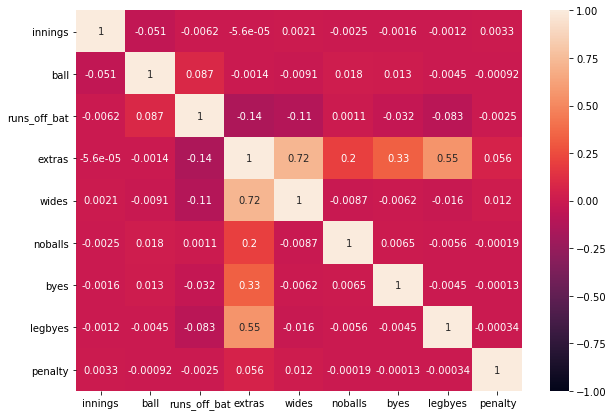

In [179]:
cor = final_df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(cor, vmax =1.0, vmin = -1.0, annot = True, annot_kws={"size": 10})


In [180]:
final_df['Score']=final_df['runs_off_bat']+final_df['extras']


In [181]:
final_df = final_df.drop(['runs_off_bat','extras'],axis=1)

In [182]:
cat_new_final.head()

,venue_Arun Jaitley Stadium,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,...,wicket_type_None,wicket_type_bowled,wicket_type_caught,wicket_type_caught and bowled,wicket_type_hit wicket,wicket_type_lbw,wicket_type_obstructing the field,wicket_type_retired hurt,wicket_type_run out,wicket_type_stumped
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [183]:
final_df.shape


(194354, 8)

In [184]:
cat_new_final.shape

(194354, 1577)

In [185]:
cric_df = pd.concat([cat_new_final , final_df], axis=1)
cric_df.head()

,venue_Arun Jaitley Stadium,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,...,wicket_type_run out,wicket_type_stumped,innings,ball,wides,noballs,byes,legbyes,penalty,Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.1,0.0,0.0,0.0,1.0,0.0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.2,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.3,1.0,0.0,0.0,0.0,0.0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.4,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.5,0.0,0.0,0.0,0.0,0.0,0


In [223]:
X = cric_df.drop('Score',axis =1 )
Y = cric_df['Score']
X_train , X_test , Y_train , Y_test = sklearn.model_selection.train_test_split(X , Y ,train_size=0.60, test_size = 0.40 , random_state = 29)



In [224]:
lm = LinearRegression()
lm.fit(X_train , Y_train)


LinearRegression()

In [225]:
from sklearn.metrics import mean_squared_error,r2_score

In [226]:
Y_pred

array([1.29030609, 1.26976776, 1.1729126 , ..., 0.93519592, 1.44000244,
       0.8646698 ])

In [227]:
Y_pred= lm.predict(X_test)

In [228]:
R_squared = r2_score(Y_test,Y_pred)
R_squared

-4.825817403739961e+16

In [229]:
mse = mean_squared_error(Y_test,Y_pred)
mse

1.2302091089480171e+17

In [230]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train , Y_train)

In [206]:
lm_accuracy=accuracy_score(Y_test, lm.predict(X_test))


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [203]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n=============")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Confusion Matrix:\n=================\n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n============")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Confusion Matrix:\n===============\n {confusion_matrix(y_test, pred)}\n")


In [205]:
print_score(lm, X_train, Y_train, X_test, Y_test, train=True)
print_score(lm, X_train, Y_train, X_test, Y_test, train=False)

lm_accuracy=accuracy_score(Y_test, lm.predict(X_test))
Y_predict = lm.predict(X_test)


Train Result:


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [56]:
new['wides'].value_counts()


0.0    188470
1.0      5362
2.0       248
5.0       218
3.0        50
4.0         6
Name: wides, dtype: int64

In [ ]:

pd.get_dummies(merge_data_df_cat)


In [34]:
new.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed'],
      dtype='object')

In [40]:
new.head(38)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,None,None,None,1,None,None,None
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,None,None,None,None,None,None,None
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,None,None,None,None,None,None
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,None,None,None,None,None,None,None
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,None,None,None,None,None,None,None
5,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.6,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,None,None,None,None,None,None,None
6,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.7,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,None,None,None,1,None,None,None
7,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,Z Khan,0,0,None,None,None,None,None,None,None
8,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,Z Khan,4,0,None,None,None,None,None,None,None
9,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,1.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,Z Khan,4,0,None,None,None,None,None,None,None


In [10]:
new.nunique()

match_id                  819
season                     14
start_date                599
venue                      42
innings                     6
ball                      180
batting_team               15
bowling_team               15
striker                   540
non_striker               533
bowler                    422
runs_off_bat                7
extras                      7
wides                       5
noballs                     4
byes                        4
legbyes                     5
penalty                     1
wicket_type                 9
player_dismissed          510
other_wicket_type           0
other_player_dismissed      0
dtype: int64

In [11]:
# removing (other_wicket_type , other_player_dismissed)

In [14]:
new['noballs']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
194349   NaN
194350   NaN
194351   NaN
194352   NaN
194353   NaN
Name: noballs, Length: 194354, dtype: float64

In [42]:
new[['ball','runs_off_bat','extras']].head(38)


,ball,runs_off_bat,extras
0,0.1,0,1
1,0.2,0,0
2,0.3,0,1
3,0.4,0,0
4,0.5,0,0
5,0.6,0,0
6,0.7,0,1
7,1.1,0,0
8,1.2,4,0
9,1.3,4,0
